# Explore Nanoimager csv

**ONI Nanoimager is a commercial widefield microscope which is used for localisation microscopy. The Nanoimager software has lots of cool features to explore and analyse the localisation data. Although you may want to explore the data further using a programming language. Python pandas is excellent for exploring and analysing tabular data and here I use it to explore the Nanoimager data which was exported as a csv.**

## Load and clean data

### Load data

In [1]:
# Here I import the python packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the localisation file from the nanoimager as a dataframe
df = pd.read_csv('SK_MG_LPS647_sparse_STORM_sample1a3_localizations.csv')

In [3]:
# Here I look at the top two rows of the dataframe.
df.head(2)

,Channel,Frame,X (nm),Y (nm),Z (nm),X precision (nm),Y precision (nm),Photons,Background,PSF Sigma X (pix),PSF Sigma Y (pix)
0,1,18,17393.363281,5341.088867,0.0,12.122814,14.760088,576.440552,45.888653,1.065249,1.301303
1,1,18,28469.585938,6503.035645,0.0,19.043039,8.590194,2415.484863,45.925720,1.979784,1.528099


In [4]:
# Here,I look at the column names, their datatypes and the number of rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485058 entries, 0 to 485057
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Channel            485058 non-null  int64  
 1   Frame              485058 non-null  int64  
 2   X (nm)             485058 non-null  float64
 3   Y (nm)             485058 non-null  float64
 4   Z (nm)             485058 non-null  float64
 5   X precision (nm)   485058 non-null  float64
 6   Y precision (nm)   485058 non-null  float64
 7   Photons            485058 non-null  float64
 8   Background         485058 non-null  float64
 9   PSF Sigma X (pix)  485058 non-null  float64
 10  PSF Sigma Y (pix)  485058 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 40.7 MB


### Clean data

Choose the colour channel (green 0 or red 1)

In [5]:
# Here I only want channel 1 or the red channel
df=df[df.Channel == 1] # filter channel 1, use 0 for the green channel
df.shape # In this case we only had channel 1 so no change in number of rows.

(485058, 11)

Drop useless columns

In [6]:
# channel and z columns are useless so I drop them
df.drop(columns=['Channel', 'Z (nm)'], inplace=True)
df.head(2)

,Frame,X (nm),Y (nm),X precision (nm),Y precision (nm),Photons,Background,PSF Sigma X (pix),PSF Sigma Y (pix)
0,18,17393.363281,5341.088867,12.122814,14.760088,576.440552,45.888653,1.065249,1.301303
1,18,28469.585938,6503.035645,19.043039,8.590194,2415.484863,45.925720,1.979784,1.528099


Fix data

In [7]:
# PSF should be in nm but ONI has left it as pixel
# convert PSF to nm and change the column names
pixel_size=117
df.rename(columns={"PSF Sigma X (pix)": "PSF Sigma X (nm)", "PSF Sigma Y (pix)": "PSF Sigma Y (nm)"}, inplace=True)
df["PSF Sigma X (nm)"]=pixel_size*df["PSF Sigma X (nm)"]
df["PSF Sigma Y (nm)"]=pixel_size*df["PSF Sigma Y (nm)"]
df.head(2)

,Frame,X (nm),Y (nm),X precision (nm),Y precision (nm),Photons,Background,PSF Sigma X (nm),PSF Sigma Y (nm)
0,18,17393.363281,5341.088867,12.122814,14.760088,576.440552,45.888653,124.634133,152.252451
1,18,28469.585938,6503.035645,19.043039,8.590194,2415.484863,45.925720,231.634728,178.787583


## Explore data

Pandas has some cool tools to explore all the columns in the dataframe in one go. Below I plot the histogram and compute the summary statistics of all the columns.

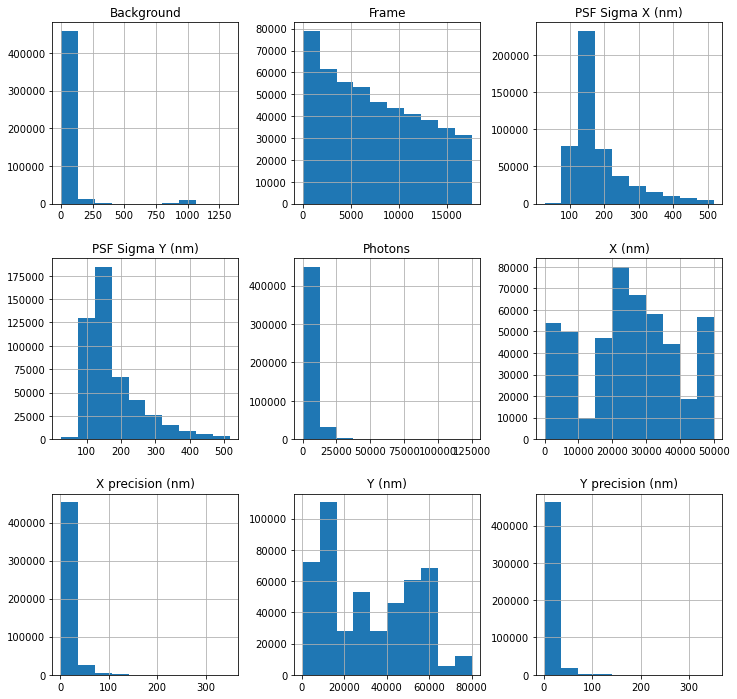

In [8]:
# Here, I plot the histogram of each column.
df.hist(figsize=(12,12));

Clearly, you can see the background is very low except for some localisations it is high. Most probably these localisations are of bright fiducials. The frame histogram shows how the number of localisations in each frame goes down with time. You can also see the distribution of sigma and precision. Looking at summary histograms, we can choose what variables to explore further and I will do that a little later.

In [9]:
# Here, I compute the summary statistics of each column.
df.describe()

,Frame,X (nm),Y (nm),X precision (nm),Y precision (nm),Photons,Background,PSF Sigma X (nm),PSF Sigma Y (nm)
count,485058.000000,485058.000000,485058.000000,485058.000000,485058.000000,485058.000000,485058.000000,485058.000000,485058.000000
mean,7475.652716,24906.905694,32007.100289,13.960656,12.482167,4117.431551,87.426190,182.416683,175.285685
std,5033.207842,13713.426682,21537.240264,17.447054,15.398973,5524.604444,151.430780,80.190685,79.632711
min,18.000000,1.309590,509.646301,0.885663,1.000285,100.147057,0.000000,26.682435,25.031916
25%,2966.000000,16927.644043,9393.729004,4.342680,4.313997,806.805130,46.052431,130.988432,122.278338
50%,6831.000000,25006.969726,29424.899415,9.105315,8.586584,1954.800110,57.544050,152.731449,144.199575
75%,11612.000000,34370.535157,50271.780274,17.485763,15.446520,5220.878784,72.428783,204.503686,204.460191
max,17626.000000,49876.058594,80122.859375,350.278046,350.405975,125032.578125,1335.638916,517.196511,517.190895


Describe() computes the summary statistics of the columns. For example the X precision has a mean of 14 nm and a standard deviation of 17 nm. The quartiles are also computed. 

## Individual exploration of some of the variable distribution

Not all fluorophores emit the same number of photons. Here I explore the photon distribution of the localisations.

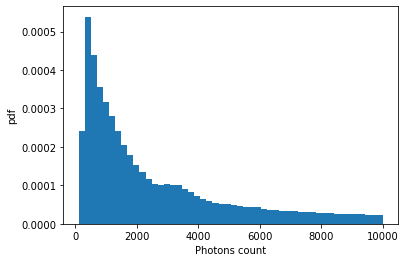

In [10]:
# Photon distribution
plt.hist(df['Photons'], bins=50, range = (100, 10000), density=True, label = 'Photons')
plt.xlabel('Photons count')
plt.ylabel('pdf');

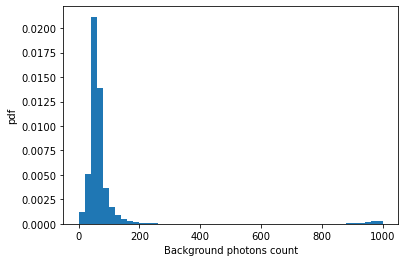

In [11]:
# Background photon distribution
plt.hist(df['Background'], bins=50, range = (0, 1000), density=True, label = 'Background')
plt.xlabel('Background photons count')
plt.ylabel('pdf');

The precision of the localisations vary for each fluorphore and depends on the photon counts. Here I explore the distribution of X precision.

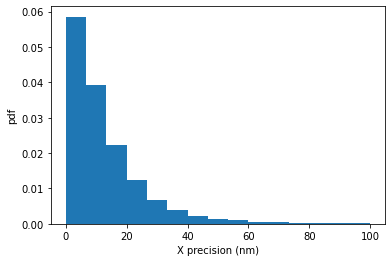

In [12]:
plt.hist(df['X precision (nm)'], bins=15, range = (0, 100), density=True, label = 'X precision (nm)')
plt.xlabel('X precision (nm)')
plt.ylabel('pdf');

The fluorphores are fit with a Gaussian to get its localisation centre. Here I explore the sigma from the fit.

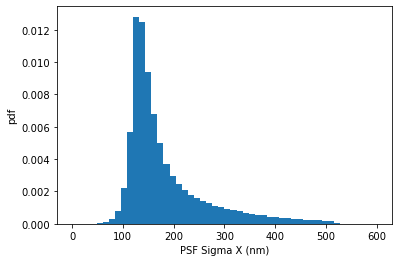

In [13]:
plt.hist(df['PSF Sigma X (nm)'], bins=50, range = (0, 600), density=True, label = 'PSF Sigma X (nm)')
plt.xlabel('PSF Sigma X (nm)')
plt.ylabel('pdf');

### Here I select a small region of the data to visualise it.

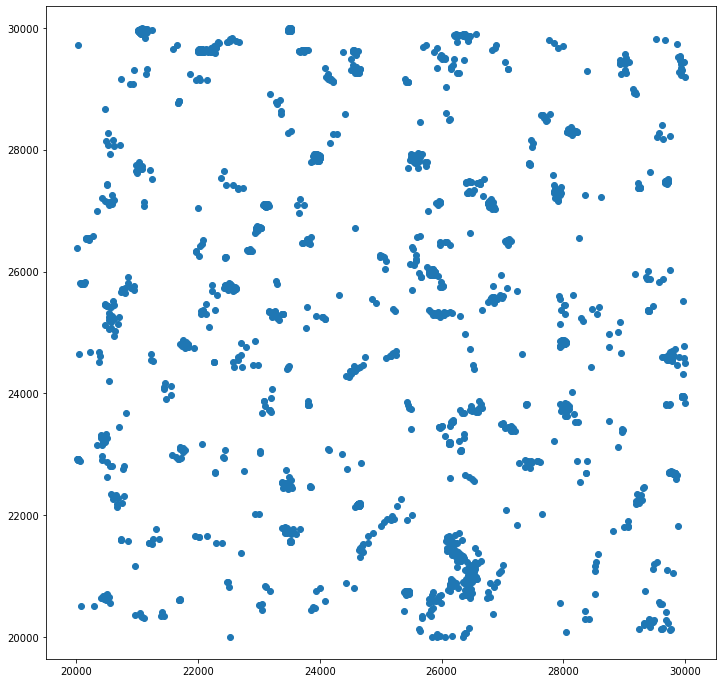

In [14]:
# look at a small area
# You can think of it as a way of cropping the data
x=df['X (nm)'][(df['X (nm)']>20000) & (df['X (nm)']<30000) & (df['Y (nm)']>20000) & (df['Y (nm)']<30000)]
y=df['Y (nm)'][(df['X (nm)']>20000) & (df['X (nm)']<30000) & (df['Y (nm)']>20000) & (df['Y (nm)']<30000)]
plt.figure(figsize=(12,12))
plt.scatter(x, y)
plt.axis('equal');